<a href="https://colab.research.google.com/github/Ranjitkumarmuduli/Smart-watch-price-prediction/blob/main/SWP_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries and dataset.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#dataset path
path='/content/drive/MyDrive/Smart Watch Price Prediction/Smart watch prices.csv'

In [23]:
#Read csv file
df=pd.read_csv(path)

In [24]:
#First Five rows of the dataset
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


In [25]:
#Last Five rows of the dataset
df.tail()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,348 x 442,50,30,Yes,No,Yes,$279
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,454 x 454,50,15,Yes,Yes,Yes,$349
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,25,Yes,Yes,Yes,$249
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,326 x 326,50,14,Yes,No,Yes,$159
378,TicWatch,Pro 3,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,454 x 454,50,72,Yes,Yes,Yes,$299


I saw that in the dataset 379 rows and 13 columns present.

#Let's go to Do some preprocessing.

In [26]:
#Let's see what type of columns are present in our dataset.
df.columns

Index(['Brand', 'Model', 'Operating System', 'Connectivity', 'Display Type',
       'Display Size (inches)', 'Resolution', 'Water Resistance (meters)',
       'Battery Life (days)', 'Heart Rate Monitor', 'GPS', 'NFC',
       'Price (USD)'],
      dtype='object')

In [27]:
#shape of the dataset
df.shape

(379, 13)

In [28]:
#let's find the data type
print(df.dtypes)

Brand                         object
Model                         object
Operating System              object
Connectivity                  object
Display Type                  object
Display Size (inches)        float64
Resolution                    object
Water Resistance (meters)     object
Battery Life (days)           object
Heart Rate Monitor            object
GPS                           object
NFC                           object
Price (USD)                   object
dtype: object


I saw that all the columns are object type except one column display size

In [29]:
#Check the number of unique value
df.select_dtypes(include="object").nunique()

Brand                         42
Model                        137
Operating System              35
Connectivity                   5
Display Type                  27
Resolution                    36
Water Resistance (meters)      7
Battery Life (days)           30
Heart Rate Monitor             1
GPS                            2
NFC                            2
Price (USD)                   50
dtype: int64

Here we get a clarity that column model is too many different values so we can remove the columns for better clarify to ML algorithm.

Let's drop the columns "Model"

In [30]:
#Drop the model columns
df.drop(columns="Model", inplace= True)
#Let's check the shape of the dataset
df.shape

(379, 12)

In [31]:
#finding missing values
print(df.isna().sum())

Brand                        1
Operating System             3
Connectivity                 1
Display Type                 2
Display Size (inches)        3
Resolution                   4
Water Resistance (meters)    1
Battery Life (days)          1
Heart Rate Monitor           1
GPS                          1
NFC                          1
Price (USD)                  1
dtype: int64


In every columns atleast one missing value is present so let's leave that we can deal with the missing values later .

We saw that values of the column "Price (USD)" is present with the USD symbol and some where comma also so we 1st remove those two the convert the column to numeric column.

#Let's remove the USD symbol and comma from the price columns.

In [32]:
#Remove USD symbol and comma from price column.
df["Price (USD)"]=df["Price (USD)"].str.replace(",","").str.replace("$"," ").str.replace(" ","")

# Convert the Price(USD) column to numeric values
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'])
df.head()

<ipython-input-32-74988255bd59>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price (USD)"]=df["Price (USD)"].str.replace(",","").str.replace("$"," ").str.replace(" ","")


,Brand,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,399.0
1,Samsung,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,249.0
2,Garmin,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,399.0
3,Fitbit,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,229.0
4,Fossil,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,299.0


In [33]:
#Check the dtype of all columns
print(df.dtypes)

Brand                         object
Operating System              object
Connectivity                  object
Display Type                  object
Display Size (inches)        float64
Resolution                    object
Water Resistance (meters)     object
Battery Life (days)           object
Heart Rate Monitor            object
GPS                           object
NFC                           object
Price (USD)                  float64
dtype: object


#Let's check the unique value of all columns


In [55]:
def get_unique_value(dataset):
  unique_values={}
  for col in dataset.columns:
    unique_values[col]=dataset[col].unique().tolist()
  return unique_values

In [60]:
print(get_unique_value(df))

{'Brand': ['Apple', 'Samsung', 'Garmin', 'Fitbit', 'Fossil', 'Huawei', 'TicWatch', 'Oppo', 'Amazfit', 'Skagen', 'Withings', 'Timex', 'Suunto', 'Mobvoi', 'Polar', 'Ticwatch', 'Xiaomi', 'Honor', 'LG', nan, 'Casio', 'OnePlus', 'Misfit', 'Moto', 'MyKronoz', 'Nubia', 'Sony', 'Zepp', 'Realme', 'Matrix', 'Kate Spade', 'Diesel', 'Michael Kors', 'Zeblaze', 'Kospet', 'Lemfo', 'TAG Heuer', 'Montblanc', 'Asus', 'Emporio Armani', 'Polaroid', 'Motorola', 'Nokia'], 'Operating System': ['watchOS', 'Wear OS', 'Garmin OS', 'Fitbit OS', 'Other', 'Unknown', 'Tizen OS', 'Proprietary OS'], 'Connectivity': ['Bluetooth, Wi-Fi, Cellular', 'Bluetooth, Wi-Fi', 'Bluetooth', 'Bluetooth, Wi-Fi, GPS', nan, 'Bluetooth, Wi-Fi, NFC'], 'Display Type': ['Other', 'AMOLED', 'IPS LCD', 'Unknown', 'LCD', 'OLED', 'TFT', 'E-Ink', 'Monochrome'], 'Display Size (inches)': [1.9, 1.4, 1.3, 1.58, 1.28, 1.43, 1.75, 1.39, nan, 1.65, 1.2, 1.57, 1.0, 1.78, 1.91, 1.38, 1.06, 1.35, 1.34, 0.9, 1.04, 1.64, 1.19, 4.01, 1.6, 1.42, 2.1, 1.23, 

#segment the operating system

In [34]:
df["Operating System"].unique()

array(['watchOS', 'Wear OS', 'Garmin OS', 'Fitbit OS', 'HarmonyOS',
       'ColorOS', 'Amazfit OS', nan, 'Withings OS', 'Polar OS',
       'Tizen OS', 'Hybrid OS', 'Lite OS', 'Tizen', 'Suunto OS',
       'Proprietary OS', 'Proprietary', 'LiteOS', 'Android Wear',
       'MIUI for Watch', 'Custom OS', 'Fossil OS', 'MIUI', 'RTOS',
       'MyKronoz OS', 'Nubia OS', 'Mi Wear OS', 'Zepp OS', 'Realme OS',
       'Matrix OS', 'Android OS', 'Casio OS', 'Skagen OS', 'Timex OS',
       'MIUI For Watch', 'Android'], dtype=object)

In [35]:
def segment_os(os):
  if pd.isnull(os):
    return 'Unknown'
  elif 'watchOS' in os:
    return 'watchOS'
  elif 'Wear OS' in os or 'Android Wear' in os:
    return 'Wear OS'
  elif 'Garmin' in os:
    return 'Garmin OS'
  elif 'Fitbit' in os:
    return 'Fitbit OS'
  elif 'Tizen' in os:
    return 'Tizen OS'
  elif 'Proprietary' in os:
    return 'Proprietary OS'
  else:
    return 'Other'

In [36]:
df['Operating System']=df['Operating System'].apply(segment_os)

In [37]:
print(df['Operating System'].unique())

['watchOS' 'Wear OS' 'Garmin OS' 'Fitbit OS' 'Other' 'Unknown' 'Tizen OS'
 'Proprietary OS']


<Axes: >

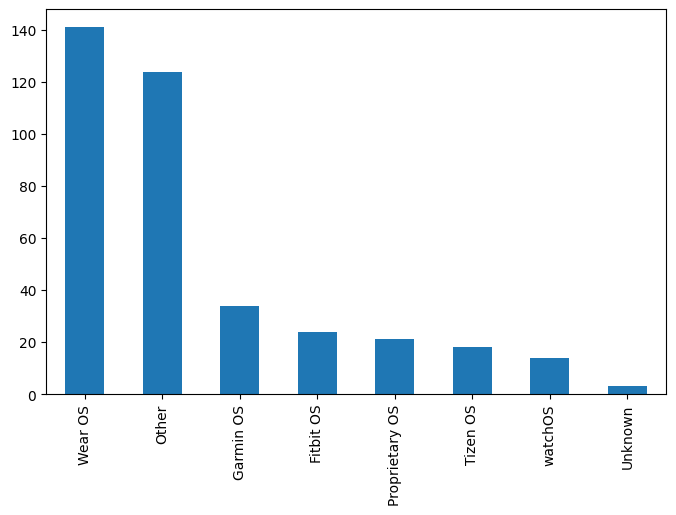

In [38]:
plt.figure(figsize=(8,5))
df['Operating System'].value_counts().plot(kind='bar')

#Segment the display type


In [39]:
df['Display Type'].unique()

array(['Retina', 'AMOLED', 'IPS LCD', nan, 'TFT LCD',
       'Memory-in-pixel (MIP)', 'Super AMOLED', 'LCD', 'Analog',
       'Transflective', 'OLED', 'Gorilla Glass', 'MIP', 'P-OLED',
       'transflective', 'PMOLED', 'TFT',
       'Sunlight-visible, transflective memory-in-pixel (MIP)', 'E-Ink',
       'E-ink', 'Sunlight-visible', 'Color Touch', 'IPS', 'Dual Layer',
       'TFT-LCD', 'STN LCD', 'Monochrome', 'Memory LCD'], dtype=object)

In [40]:
def segment_display_type(display_type):
    if pd.isnull(display_type):
        return 'Unknown'
    elif 'AMOLED' in display_type:
        return 'AMOLED'
    elif 'IPS LCD' in display_type or 'IPS' in display_type:
        return 'IPS LCD'
    elif 'LCD' in display_type:
        return 'LCD'
    elif 'OLED' in display_type:
        return 'OLED'
    elif 'TFT' in display_type:
        return 'TFT'
    elif 'E-Ink' in display_type or 'E-ink' in display_type:
        return 'E-Ink'
    elif 'PMOLED' in display_type:
        return 'PMOLED'
    elif 'STN LCD' in display_type:
        return 'STN LCD'
    elif 'Monochrome' in display_type:
        return 'Monochrome'
    elif 'Memory LCD' in display_type:
        return 'Memory LCD'
    else:
        return 'Other'

In [41]:
df['Display Type']=df['Display Type'].apply(segment_display_type)

<Axes: >

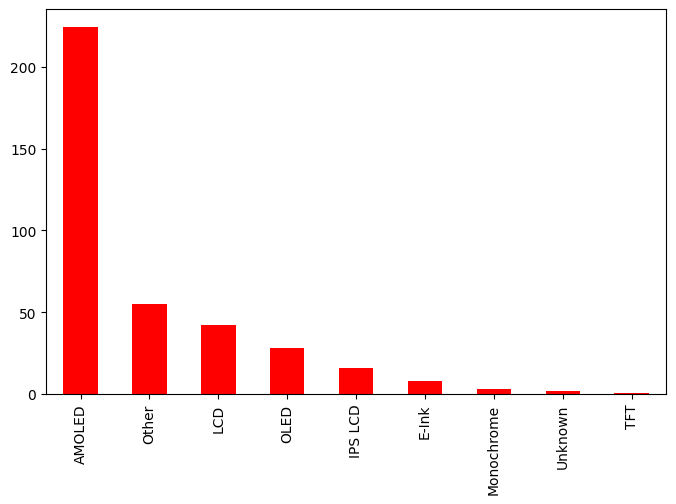

In [43]:
plt.figure(figsize=(8,5))
df['Display Type'].value_counts().plot(kind='bar',color='red')

We saw that in column 'Heart Rate Monitor' has only one unique value.so reomve the column.

#Remove 'Heart Rate Monitor'

In [61]:
#check shape
df.shape

(379, 12)

In [62]:
df.drop(columns='Heart Rate Monitor',inplace=True)
df.shape

(379, 11)

#Segment the Brand

In [63]:
df['Brand'].unique()

array(['Apple', 'Samsung', 'Garmin', 'Fitbit', 'Fossil', 'Huawei',
       'TicWatch', 'Oppo', 'Amazfit', 'Skagen', 'Withings', 'Timex',
       'Suunto', 'Mobvoi', 'Polar', 'Ticwatch', 'Xiaomi', 'Honor', 'LG',
       nan, 'Casio', 'OnePlus', 'Misfit', 'Moto', 'MyKronoz', 'Nubia',
       'Sony', 'Zepp', 'Realme', 'Matrix', 'Kate Spade', 'Diesel',
       'Michael Kors', 'Zeblaze', 'Kospet', 'Lemfo', 'TAG Heuer',
       'Montblanc', 'Asus', 'Emporio Armani', 'Polaroid', 'Motorola',
       'Nokia'], dtype=object)

In [64]:
def segment_brand(brand):
    if pd.isnull(brand):
        return 'Unknown'
    elif 'Apple' in brand:
        return 'Apple'
    elif 'Samsung' in brand:
        return 'Samsung'
    elif 'Fitbit' in brand:
        return 'Fitbit'
    elif 'Huawei' in brand:
        return 'Huawei'
    elif 'TicWatch' in brand or 'Ticwatch' in brand:
        return 'TicWatch'
    elif 'Polar' in brand:
        return 'Polar'
    elif 'Xiaomi' in brand:
        return 'Xiaomi'
    elif 'LG' in brand:
        return 'LG'
    elif 'Casio' in brand:
        return 'Casio'
    elif 'Moto' in brand or 'Motorola' in brand:
        return 'Motorola'
    elif 'Sony' in brand:
        return 'Sony'
    else:
        return 'Other'

In [65]:
df['Brand']=df['Brand'].apply(segment_brand)

<Axes: >

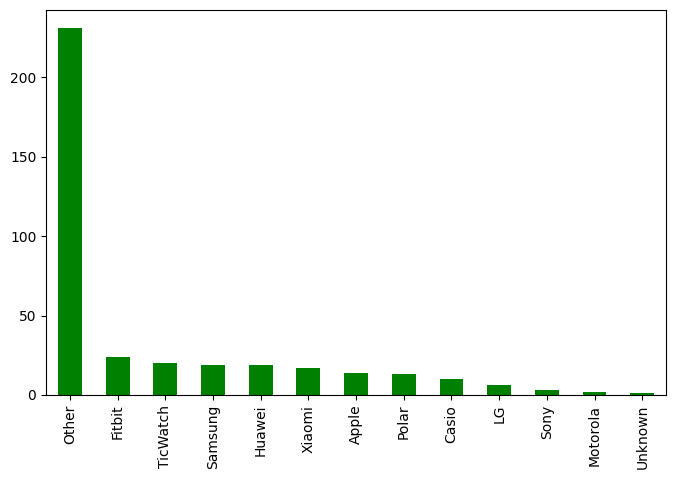

In [67]:
plt.figure(figsize=(8,5))
df['Brand'].value_counts().plot(kind='bar',color='green')

#Segment the Resolution

In [68]:
df['Resolution'].unique()

array(['396 x 484', '450 x 450', '416 x 416', '336 x 336', '466 x 466',
       '360 x 360', '372 x 430', '454 x 454', nan, '240 x 240',
       '390 x 390', '394 x 324', '240 x 201', '368 x 448', '400 x 400',
       '324 x 394', '320 x 320', '348 x 442', '402 x 476', '480 x 480',
       '176 x 176', '300 x 300', '200 x 200', '280 x 280', '128 x 128',
       '240 x 198', '280 x 456', '328 x 328', '960 x 192', '348 x 250',
       '320 x 300', '320 x 302', '228 x 172', '160 x 160', '260 x 260',
       '126 x 36', '326 x 326'], dtype=object)

In [69]:
def segment_resolution(resolution):
    if pd.isnull(resolution):
        return 'Unknown'
    res = resolution.split(' x ')
    width = int(res[0])
    height = int(res[1])
    if width < 200 or height < 200:
        return 'Low'
    elif width < 400 or height < 400:
        return 'Medium'
    elif width < 800 or height < 800:
        return 'High'
    else:
        return 'Very high'


In [70]:
df['Resolution']=df['Resolution'].apply(segment_resolution)

<Axes: >

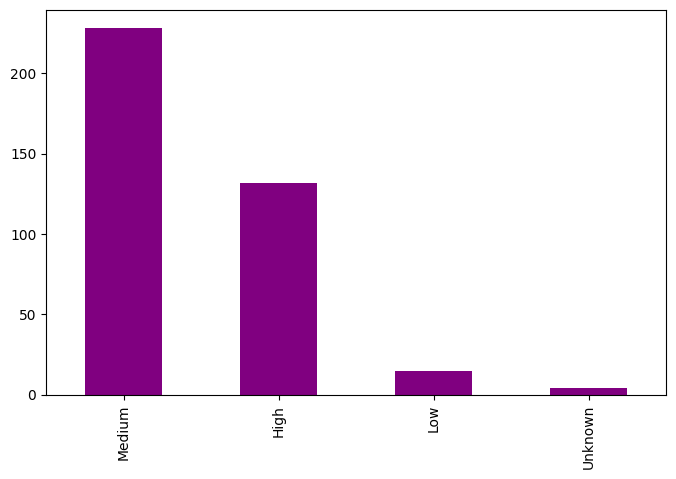

In [74]:
plt.figure(figsize=(8,5))
df['Resolution'].value_counts().plot(kind='bar',color='purple')

#Segment the Battery Life

In [76]:
df['Battery Life (days)'].unique()

array(['18', '40', '11', '6', '24', '14', '2', '4', '12', '30', '3', '45',
       '5', '10', '48', '7', '16', '9', '25', '72', '60', '56', nan, '70',
       '1', '48 hours', '15', 'Unlimited', '1.5', '20', '8'], dtype=object)

In [77]:
def segment_battery_life(battery_life):
    if pd.isnull(battery_life):
        return 'Unknown'
    elif battery_life == '48 hours':
        return '1-10'
    elif battery_life == '1.5':
        return '1-10'
    elif battery_life == 'Unlimited':
        return '>30'
    else:
        try:
            days = int(battery_life)
            if days >= 1 and days <= 10:
                return '1-10'
            elif days >= 11 and days <= 20:
                return '11-20'
            elif days >= 21 and days <= 30:
                return '21-30'
            else:
                return '>30'
        except ValueError:
            return 'Unknown'

In [78]:
df['Battery Life (days)']=df['Battery Life (days)'].apply(segment_battery_life)

<Axes: >

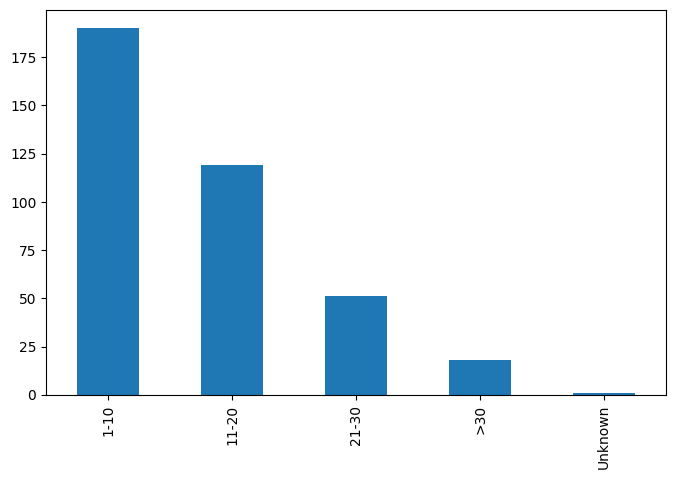

In [80]:
plt.figure(figsize=(8,5))
df['Battery Life (days)'].value_counts().plot(kind='bar')

#Segment the Water resistance(meters)

In [81]:
df['Water Resistance (meters)'].unique()

array(['50', '30', '100', '1.5', nan, 'Not specified', '200', '10'],
      dtype=object)

In [82]:
def segment_water_resistance(water_resistance):
    if pd.isnull(water_resistance) or water_resistance == 'Not specified':
        return 'Unknown'
    elif water_resistance == '1.5':
        return 'Splash resistant'
    else:
        depth = int(water_resistance)
        if depth >= 0 and depth <= 50:
            return '50m or less'
        elif depth > 50 and depth <= 100:
            return '51m - 100m'
        else:
            return 'More than 100m'

In [83]:
df['Water Resistance (meters)']=df['Water Resistance (meters)'].apply(segment_water_resistance)

<Axes: >

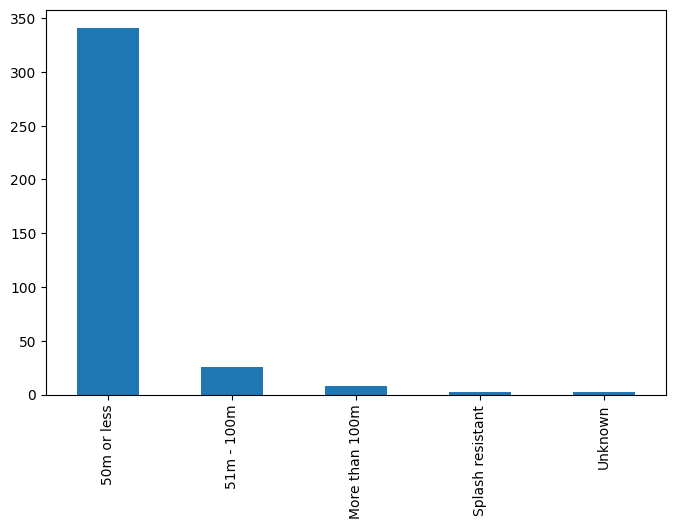

In [84]:
plt.figure(figsize=(8,5))
df['Water Resistance (meters)'].value_counts().plot(kind='bar')